In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
bollywood_movies = pd.read_csv("bollywood_movies(2013-2015).csv")
bollywood_movies

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [3]:
#All about data at a glance
bollywood_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [4]:
#Total records in dataset
bollywood_movies.shape

(149, 10)

In [5]:
#2. How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order. 
total = bollywood_movies["Genre"].value_counts()
print(f"Total number movies in each genre: \n{total}")

Total number movies in each genre: 
Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: count, dtype: int64


In [6]:
#3. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)
crosstab = pd.crosstab(bollywood_movies["Genre"],bollywood_movies["ReleaseTime"])
crosstab

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


In [7]:
bollywood_movies.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [8]:
#Column name correction
bollywood_movies.columns = [col.strip().replace(" ","") for col in bollywood_movies.columns]

In [9]:
#convert datetime object into datetime
bollywood_movies["ReleaseDate"] = pd.to_datetime(bollywood_movies["ReleaseDate"], format="%d-%b-%y", errors="coerce")

In [10]:
 #Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.) 
bollywood_movies["Month"] = bollywood_movies["ReleaseDate"].dt.month_name()
bollywood_movies["Month"].value_counts()

Month
January      20
March        19
May          18
July         16
February     16
April        11
June         10
September    10
November     10
October       9
August        8
December      2
Name: count, dtype: int64

In [11]:
#which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more
high_budget = bollywood_movies[bollywood_movies["Budget"]>=25]
monthly_high_budget = high_budget["Month"].value_counts()
print(f"Month wise high budget movies: {monthly_high_budget.idxmax}")

Month wise high budget movies: <bound method Series.idxmax of Month
February     9
January      8
August       7
March        7
November     6
July         6
June         5
September    5
April        4
October      4
May          3
December     2
Name: count, dtype: int64>


In [12]:
#Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.
bollywood_movies["ROI"] = ((bollywood_movies["BoxOfficeCollection"]-bollywood_movies["Budget"])/bollywood_movies["Budget"])
bollywood_movies[["MovieName", "Budget", "BoxOfficeCollection","ROI"]].sort_values(by="ROI", ascending=False).head(10)

,MovieName,Budget,BoxOfficeCollection,ROI
64,Aashiqui 2,12,110.0,8.166667
89,PK,85,735.0,7.647059
132,Grand Masti,35,298.0,7.514286
135,The Lunchbox,10,85.0,7.500000
87,Fukrey,5,36.2,6.240000
58,Mary Kom,15,104.0,5.933333
128,Shahid,6,40.0,5.666667
37,Humpty Sharma Ki Dulhania,20,130.0,5.500000
101,Bhaag Milkha Bhaag,30,164.0,4.466667
115,Chennai Express,75,395.0,4.266667


In [13]:
#Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the  average ROI for different release times. 
bollywood_movies.groupby("ReleaseTime")["ROI"].mean().sort_values(ascending=False)

ReleaseTime
LW    1.127205
FS    0.973853
HS    0.850867
N     0.657722
Name: ROI, dtype: float64

In [14]:
plt.style.use("ggplot")
sns.set_palette("pastel")

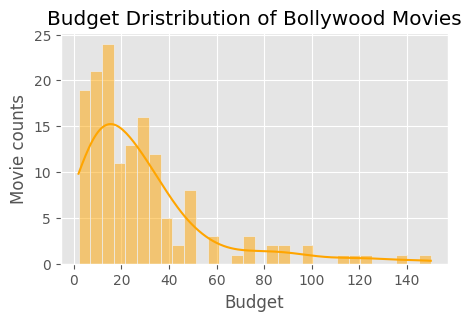

In [15]:
#Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot  to conclude if the most movies are high or low budgeted movies.
plt.figure(figsize=(5,3))
sns.histplot(bollywood_movies["Budget"], bins=30, kde=True, color="orange")
plt.title("Budget Dristribution of Bollywood Movies")
plt.xlabel("Budget")
plt.ylabel("Movie counts")
plt.show()

In [16]:
bollywood_movies["Genre"].value_counts()

Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: count, dtype: int64

In [17]:
bollywood_movies["Genre"].unique()


array(['Romance', 'Thriller ', 'Comedy', ' Drama ', 'Action ', 'Action',
       'Thriller'], dtype=object)

In [18]:
bollywood_movies[bollywood_movies["Genre"].isin(["Comedy", "Drama"])]["Genre"].isna().sum()


np.int64(0)

In [19]:
bollywood_movies["Genre"] = bollywood_movies["Genre"].str.strip()

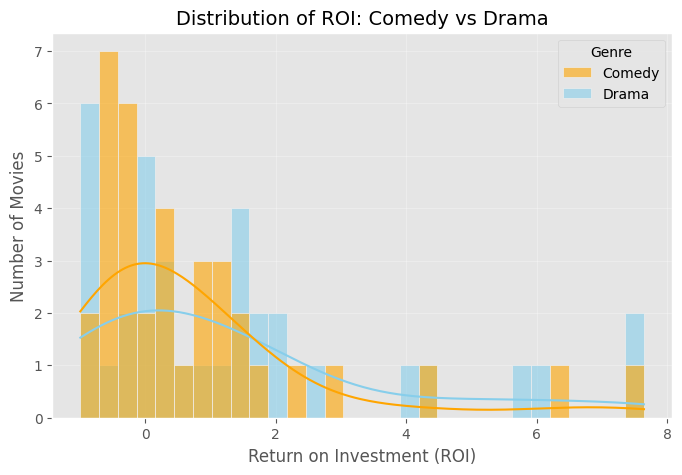

In [20]:
#Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs? 
plt.figure(figsize=(8,5))
sns.histplot(
    data=bollywood_movies[bollywood_movies["Genre"].isin(["Comedy", "Drama"])],
    x="ROI",
    hue="Genre",
    bins=30,
    kde=True,
    palette=["orange", "skyblue"],
    alpha=0.6
)
plt.title("Distribution of ROI: Comedy vs Drama", fontsize=14)
plt.xlabel("Return on Investment (ROI)")
plt.ylabel("Number of Movies")
plt.grid(alpha=0.3)
plt.show()


In [21]:
#Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?
correlation_df = bollywood_movies[["BoxOfficeCollection","YoutubeLikes"]].corr()
correlation_df
#all correlation between box office collection and youtube likes is positive
#there are medium correlation between them

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


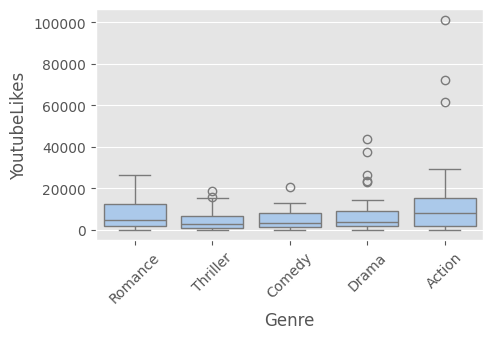

In [22]:
#Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare. 
plt.figure(figsize=(5,3))
sns.boxplot(x="Genre", y="YoutubeLikes", data=bollywood_movies)
plt.xticks(rotation=45)
plt.show()

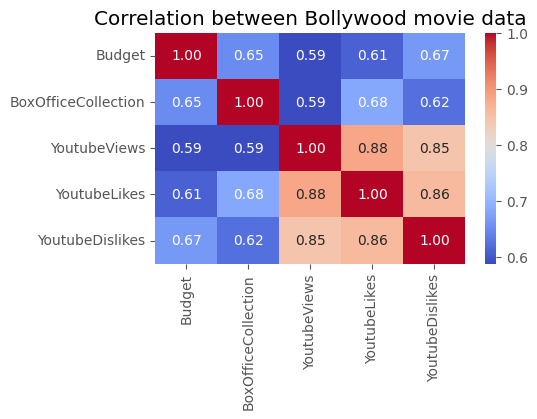

In [23]:
#Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.
corr_df = bollywood_movies[["Budget","BoxOfficeCollection","YoutubeViews","YoutubeLikes","YoutubeDislikes"]].corr()
plt.figure(figsize=(5,3))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Bollywood movie data")
plt.show()